In [ ]:
# conda install -c conda-forge shapely 
# conda install -c conda-forge pyshp
# conda install -c conda-forge utm 
# conda install -c conda-forge pyspark 

In [43]:
# df_loc.to_pickle('df_loc.pkl')

# Read the data frame
single list of lat long from Jan

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import shapely
from shapely.geometry import Point # Point class
from shapely.geometry import shape # shape() is a function to convert geo objects through the interface
import shapefile
import pandas as pd
import numpy as np


In [2]:
#LongLat = pd.read_pickle('LongLat.pkl')

In [3]:
LongLat = pd.read_pickle('LongLat_UTM.pkl')

In [4]:
# https://chrishavlin.com/2016/11/16/shapefiles-tutorial/
shp = shapefile.Reader('shapefiles/taxi_zones.shp') #open the shapefile
print ('number of shapes imported: %s' % len(shp.shapes()))

number of shapes imported: 263


In [28]:
# https://pypi.org/project/pyshp/#reading-records
shp.shapeType
# POLYGON = 5


5

In [29]:
shp.bbox

[913175.109008804, 120121.88125434518, 1067382.508405164, 272844.2940054685]

In [30]:
shp.shape(7)

In [31]:
shp.fields

[('DeletionFlag', 'C', 1, 0),
 ['OBJECTID', 'N', 9, 0],
 ['Shape_Leng', 'F', 19, 11],
 ['Shape_Area', 'F', 19, 11],
 ['zone', 'C', 254, 0],
 ['LocationID', 'N', 4, 0],
 ['borough', 'C', 254, 0]]

In [5]:
shape_ex = shp.shape(5)
x_lon = np.zeros((len(shape_ex.points),1))
y_lat = np.zeros((len(shape_ex.points),1))
for ip in range(len(shape_ex.points)):
    x_lon[ip] = shape_ex.points[ip][0]
    y_lat[ip] = shape_ex.points[ip][1]

(958451.7027633935, 969746.3320312649)

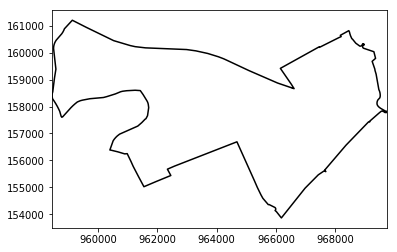

In [6]:
plt.plot(x_lon,y_lat,'k')

# use bbox (bounding box) to set plot limits
plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])

In [7]:
all_shapes = shp.shapes() # get all the polygons
all_records = shp.records()


In [8]:
len(all_shapes)

263

In [12]:
print(all_records)

[Record #0: [1, 0.116357453189, 0.0007823067885, 'Newark Airport', 1, 'EWR'], Record #1: [2, 0.43346966679, 0.00486634037837, 'Jamaica Bay', 2, 'Queens'], Record #2: [3, 0.0843411059012, 0.000314414156821, 'Allerton/Pelham Gardens', 3, 'Bronx'], Record #3: [4, 0.0435665270921, 0.000111871946192, 'Alphabet City', 4, 'Manhattan'], Record #4: [5, 0.0921464898574, 0.000497957489363, 'Arden Heights', 5, 'Staten Island'], Record #5: [6, 0.150490542523, 0.000606460984581, 'Arrochar/Fort Wadsworth', 6, 'Staten Island'], Record #6: [7, 0.107417171123, 0.000389787989274, 'Astoria', 7, 'Queens'], Record #7: [8, 0.0275906911574, 2.6587716279e-05, 'Astoria Park', 8, 'Queens'], Record #8: [9, 0.0997840924705, 0.000338443803197, 'Auburndale', 9, 'Queens'], Record #9: [10, 0.0998394794152, 0.000435823818081, 'Baisley Park', 10, 'Queens'], Record #10: [11, 0.0792110389596, 0.00026452053504, 'Bath Beach', 11, 'Brooklyn'], Record #11: [12, 0.0366613013579, 4.15116236727e-05, 'Battery Park', 12, 'Manhatta

In [17]:
x = LongLat['x'][0]
y = LongLat['y'][0]
print(x,y)

586252.1543279701 4512392.943877186


In [19]:
print(Point(x,y))

POINT (586252.1543279701 4512392.943877186)


False

In [26]:
for i in range(0, len(all_shapes)): # len(all_shapes)
        boundary = all_shapes[i] # get a boundary polygon
        print(boundary)
        if Point(x,y).within(shape(boundary)): # make a point and see if it's in the polygon
            name = all_records[i][3] # get the fourth field of the corresponding record
            print ("The point is in", name  )
            
    #name = all_records[i][3] # get the fourth field of the corresponding record
    #print ("The point is not in", name  )          

In [22]:
for row in range(0, 1000):
    point = LongLat['LaLoPoint'][row]
    for i in range(0, len(all_shapes)): # len(all_shapes)
        boundary = all_shapes[i] # get a boundary polygon
        #print(boundary)
        if Point(x,y).within(shape(boundary)): # make a point and see if it's in the polygon
            name = all_records[i][3] # get the fourth field of the corresponding record
            print ("The point is in", name  )
            
    #name = all_records[i][3] # get the fourth field of the corresponding record
    #print ("The point is not in", name  )          

KeyError: 100

# Location Data

In [36]:
def get_lat_lon(sf):
    content = []
    for sr in sf.shapeRecords():
        shape = sr.shape
        rec = sr.record
        loc_id = rec[shp_dic['LocationID']]
        
        x = (shape.bbox[0]+shape.bbox[2])/2
        y = (shape.bbox[1]+shape.bbox[3])/2 
        content.append((loc_id, x, y))
    return pd.DataFrame(content, columns=["LocationID", "longitude", "latitude"])

In [37]:
sf = shapefile.Reader("shapefiles/taxi_zones.shp")
sf

In [38]:
fields_name = [field[0] for field in sf.fields[1:]]
fields_name

['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough']

In [39]:
shp_dic = dict(zip(fields_name, list(range(len(fields_name)))))
shp_dic

{'OBJECTID': 0,
 'Shape_Leng': 1,
 'Shape_Area': 2,
 'zone': 3,
 'LocationID': 4,
 'borough': 5}

In [40]:
attributes = sf.records()
attributes

[Record #0: [1, 0.116357453189, 0.0007823067885, 'Newark Airport', 1, 'EWR'],
 Record #1: [2, 0.43346966679, 0.00486634037837, 'Jamaica Bay', 2, 'Queens'],
 Record #2: [3, 0.0843411059012, 0.000314414156821, 'Allerton/Pelham Gardens', 3, 'Bronx'],
 Record #3: [4, 0.0435665270921, 0.000111871946192, 'Alphabet City', 4, 'Manhattan'],
 Record #4: [5, 0.0921464898574, 0.000497957489363, 'Arden Heights', 5, 'Staten Island'],
 Record #5: [6, 0.150490542523, 0.000606460984581, 'Arrochar/Fort Wadsworth', 6, 'Staten Island'],
 Record #6: [7, 0.107417171123, 0.000389787989274, 'Astoria', 7, 'Queens'],
 Record #7: [8, 0.0275906911574, 2.6587716279e-05, 'Astoria Park', 8, 'Queens'],
 Record #8: [9, 0.0997840924705, 0.000338443803197, 'Auburndale', 9, 'Queens'],
 Record #9: [10, 0.0998394794152, 0.000435823818081, 'Baisley Park', 10, 'Queens'],
 Record #10: [11, 0.0792110389596, 0.00026452053504, 'Bath Beach', 11, 'Brooklyn'],
 Record #11: [12, 0.0366613013579, 4.15116236727e-05, 'Battery Park', 12

In [41]:
shp_attr = [dict(zip(fields_name, attr)) for attr in attributes]
shp_attr


[{'OBJECTID': 1,
  'Shape_Leng': 0.116357453189,
  'Shape_Area': 0.0007823067885,
  'zone': 'Newark Airport',
  'LocationID': 1,
  'borough': 'EWR'},
 {'OBJECTID': 2,
  'Shape_Leng': 0.43346966679,
  'Shape_Area': 0.00486634037837,
  'zone': 'Jamaica Bay',
  'LocationID': 2,
  'borough': 'Queens'},
 {'OBJECTID': 3,
  'Shape_Leng': 0.0843411059012,
  'Shape_Area': 0.000314414156821,
  'zone': 'Allerton/Pelham Gardens',
  'LocationID': 3,
  'borough': 'Bronx'},
 {'OBJECTID': 4,
  'Shape_Leng': 0.0435665270921,
  'Shape_Area': 0.000111871946192,
  'zone': 'Alphabet City',
  'LocationID': 4,
  'borough': 'Manhattan'},
 {'OBJECTID': 5,
  'Shape_Leng': 0.0921464898574,
  'Shape_Area': 0.000497957489363,
  'zone': 'Arden Heights',
  'LocationID': 5,
  'borough': 'Staten Island'},
 {'OBJECTID': 6,
  'Shape_Leng': 0.150490542523,
  'Shape_Area': 0.000606460984581,
  'zone': 'Arrochar/Fort Wadsworth',
  'LocationID': 6,
  'borough': 'Staten Island'},
 {'OBJECTID': 7,
  'Shape_Leng': 0.1074171711

In [42]:
df_loc = pd.DataFrame(shp_attr).join(get_lat_lon(sf).set_index("LocationID"), on="LocationID")
df_loc.head()

,LocationID,OBJECTID,Shape_Area,Shape_Leng,borough,zone,longitude,latitude
0,1,1,0.000782,0.116357,EWR,Newark Airport,9.366817e+05,190522.130278
1,2,2,0.004866,0.433470,Queens,Jamaica Bay,1.033536e+06,161853.982300
2,3,3,0.000314,0.084341,Bronx,Allerton/Pelham Gardens,1.027136e+06,254730.010849
3,4,4,0.000112,0.043567,Manhattan,Alphabet City,9.904240e+05,203100.040432
4,5,5,0.000498,0.092146,Staten Island,Arden Heights,9.321332e+05,139954.541936


# Try to find the closest 

In [32]:
from math import cos, asin, sqrt

def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(a))

def closest(data, v):
    return min(data, key=lambda p: distance(v['lat'],v['lon'],p['lat'],p['lon']))



In [33]:
tempDataList = [{'lat': 39.7612992, 'lon': -86.1519681}, 
                {'lat': 39.762241,  'lon': -86.158436 }, 
                {'lat': 39.7622292, 'lon': -86.1578917}]

In [34]:


v = {'lat': 39.7622290, 'lon': -86.1519750}
print(closest(tempDataList, v))

{'lat': 39.7612992, 'lon': -86.1519681}
